<a href="https://colab.research.google.com/github/MAristyaP/PCVK_Genap_2021/blob/main/ProjectPCVK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import zipfile, imutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from sklearn.metrics import classification_report
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [5]:
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [6]:
train_data[0].shape

(28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [9]:
digits_data.shape

(70000, 28, 28)

In [10]:
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 7')

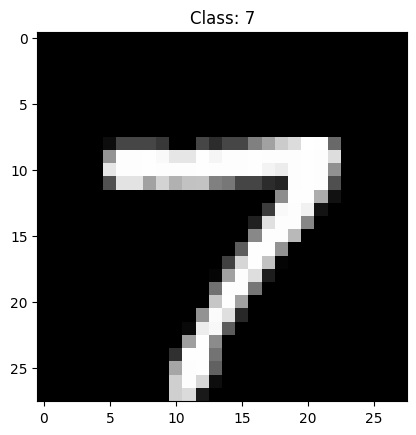

In [11]:
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

Load Kaggle A-Z

In [12]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-16 05:58:38--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  85.0MB/s    in 2.2s    

2023-12-16 05:58:40 (85.0 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [13]:
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [14]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
...       ...    ...    ...    ...    ...    ...    ...    ...  
372445    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372446    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372447    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372448    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372449    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[372450 rows x 785 columns]

In [15]:
alphabet_data = dataset_az.drop('0', axis=1)
alphabet_labels = dataset_az['0']

In [16]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [17]:
alphabet_labels.shape

(372450,)

In [18]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 10.0')

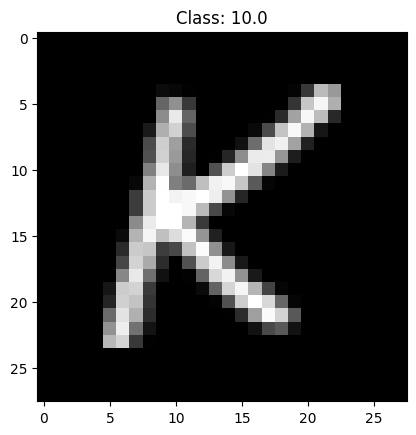

In [19]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

Combine Dataset (MNIST + Kaggel A-Z)

In [20]:
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [22]:
alphabet_labels += 10

In [23]:
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [24]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [25]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [26]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [27]:
data = np.array(data, dtype = 'float32')

In [28]:
data = np.expand_dims(data, axis=-1)

data.shape

(442450, 28, 28, 1)

Preprocessing

In [29]:
data /= 255.0

In [30]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [31]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [32]:
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

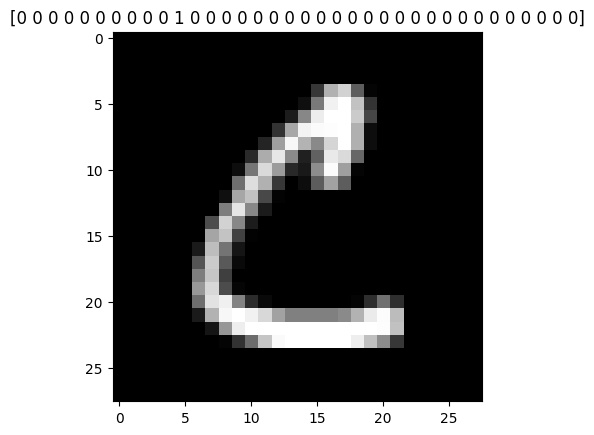

In [33]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [34]:
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [35]:
classes_total.max()

57825

In [36]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

Build CNN Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# output
model.add(Dense(36, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [42]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [43]:
import joblib

joblib.dump(name_labels, "labels.project")

['labels.project']

In [44]:
a = joblib.load("labels.project")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


Train model

In [45]:
file_model = 'manual_ocr.model'
epochs = 10
batch_size = 128

In [46]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [47]:
history = model.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/10
2765/2765 [==============================] - ETA: 0s - loss: 2.2174 - accuracy: 0.8235
Epoch 1: val_loss improved from inf to 0.25489, saving model to manual_ocr.model
2765/2765 [==============================] - 139s 48ms/step - loss: 2.2174 - accuracy: 0.8235 - val_loss: 0.2549 - val_accuracy: 0.9089
Epoch 2/10
2765/2765 [==============================] - ETA: 0s - loss: 1.0012 - accuracy: 0.9006
Epoch 2: val_loss improved from 0.25489 to 0.22508, saving model to manual_ocr.model
2765/2765 [==============================] - 127s 46ms/step - loss: 1.0012 - accuracy: 0.9006 - val_loss: 0.2251 - val_accuracy: 0.9128
Epoch 3/10
2765/2765 [==============================] - ETA: 0s - loss: 0.8320 - accuracy: 0.9118
Epoch 3: val_loss improved from 0.22508 to 0.19949, saving model to manual_ocr.model
2765/2765 [==============================] - 130s 47ms/step - loss: 0.8320 - accuracy: 0.9118 - val_loss: 0.1995 - val_accuracy: 0.9218
Epoch 4/10
2765/2765 [=========================

In [48]:
predictions = model.predict(X_test, batch_size=batch_size)

# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

692/692 [==============================] - 2s 2ms/step


array([6.2939837e-10, 1.3898865e-10, 1.1736478e-06, 1.3331452e-03,
       4.2252202e-09, 9.8715156e-02, 2.7121655e-07, 4.7024967e-11,
       2.4194229e-08, 1.2830664e-06, 1.2502757e-14, 4.2555602e-08,
       4.7808054e-08, 4.1190149e-09, 1.7129948e-07, 3.0557880e-13,
       2.9971532e-05, 6.4684772e-12, 1.4402983e-12, 7.9434685e-06,
       1.5406194e-10, 4.3339601e-06, 2.3071206e-11, 6.4502216e-11,
       5.6464761e-10, 1.6404110e-08, 1.7080193e-09, 1.3735947e-13,
       8.9990574e-01, 1.3147088e-10, 3.0665050e-11, 4.0538788e-13,
       6.5218286e-10, 1.4256464e-15, 7.0685070e-07, 5.6242944e-09],
      dtype=float32)

In [49]:
name_labels[np.argmax(predictions[10])]

'S'

In [50]:
np.argmax(y_test[10]) == np.argmax(predictions[10])

True

In [51]:
model.evaluate(X_test, y_test)

2766/2766 [==============================] - 11s 4ms/step - loss: 0.3027 - accuracy: 0.8765


[0.30265215039253235, 0.876460611820221]

In [52]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.18      0.95      0.30      1381
           1       0.96      0.99      0.98      1575
           2       0.86      0.99      0.92      1398
           3       0.95      0.99      0.97      1428
           4       0.82      0.99      0.90      1365
           5       0.29      0.98      0.45      1263
           6       0.85      0.99      0.91      1375
           7       0.95      0.99      0.97      1459
           8       0.93      0.99      0.96      1365
           9       0.97      0.97      0.97      1392
           A       1.00      0.97      0.98      2774
           B       0.96      0.99      0.98      1734
           C       0.99      0.96      0.98      4682
           D       0.93      0.96      0.94      2027
           E       0.99      0.98      0.99      2288
           F       0.96      1.00      0.98       233
           G       0.99      0.88      0.93      1152
           H       0.95    

In [53]:
model.save('model', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Preprocessing Function

In [54]:
def stackImages(imgArray,scale,lables=[]):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
            hor_con[x] = np.concatenate(imgArray[x])
        ver = np.vstack(hor)
        ver_con = np.concatenate(hor)
    else:
        for x in range(0, rows):
            imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        hor_con= np.concatenate(imgArray)
        ver = hor
    if len(lables) != 0:
        eachImgWidth= int(ver.shape[1] / cols)
        eachImgHeight = int(ver.shape[0] / rows)
        print(eachImgHeight)
        for d in range(0, rows):
            for c in range (0,cols):
                cv2.rectangle(ver,(c*eachImgWidth,eachImgHeight*d),(c*eachImgWidth+len(lables[d])*13+27,30+eachImgHeight*d),(255,255,255),cv2.FILLED)
                cv2.putText(ver,lables[d],(eachImgWidth*c+10,eachImgHeight*d+20),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),2)
    return ver

def reorder(myPoints):

    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] =myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] =myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]

    return myPointsNew


def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 5000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest,max_area
def drawRectangle(img,biggest,thickness):
    cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)

    return img

def nothing(x):
    pass

In [55]:
def preprocessing(img):
  heightImg = 480
  widthImg  = 640
  img = cv2.resize(img, (widthImg, heightImg)) # RESIZE IMAGE
  imgBlank = np.zeros((heightImg,widthImg, 3), np.uint8) # CREATE A BLANK IMAGE FOR TESTING DEBUGING IF REQUIRED
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
  imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR

  imgThreshold = cv2.Canny(imgBlur, 50, 150) # APPLY CANNY BLUR
  kernel = np.ones((5, 5))
  imgDial = cv2.dilate(imgThreshold, kernel, iterations=2) # APPLY DILATION
  imgThreshold = cv2.erode(imgDial, kernel, iterations=1)  # APPLY EROSION

  ## FIND ALL COUNTOURS
  imgContours = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
  imgBigContour = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
  contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FIND ALL CONTOURS
  cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS

  # FIND THE BIGGEST COUNTOUR
  biggest, maxArea = biggestContour(contours) # FIND THE BIGGEST CONTOUR
  if biggest.size != 0:
    biggest = reorder(biggest)
    cv2.drawContours(imgBigContour, biggest, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
    imgBigContour = drawRectangle(imgBigContour,biggest,2)
    pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))

    #REMOVE 20 PIXELS FORM EACH SIDE
    imgWarpColored=imgWarpColored[20:imgWarpColored.shape[0] - 20, 20:imgWarpColored.shape[1] - 20]
    imgWarpColored = cv2.resize(imgWarpColored,(widthImg,heightImg))

    # APPLY ADAPTIVE THRESHOLD
    imgWarpGray = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
    imgAdaptiveThre = cv2.adaptiveThreshold(imgWarpGray, 255, 1, 1, 7, 2)
    imgAdaptiveThre = cv2.bitwise_not(imgAdaptiveThre)
    imgAdaptiveThre = cv2.medianBlur(imgAdaptiveThre,3)

    # Image Array for Display
    # imageArray = ([img,imgGray,imgThreshold,imgContours],
    #   [imgBigContour,imgWarpColored, imgWarpGray,imgAdaptiveThre])

    return imgAdaptiveThre

  else:
    # imageArray = ([img,imgGray,imgThreshold,imgContours],
    #   [imgBlank, imgBlank, imgBlank, imgBlank])

    return imgContours

In [56]:
import os

if not os.path.exists("foto"):
  os.makedirs("foto")
  os.makedirs("foto/aristya")
  os.makedirs("foto/filla")

In [57]:
pip install opencv-python


In [58]:
import cv2

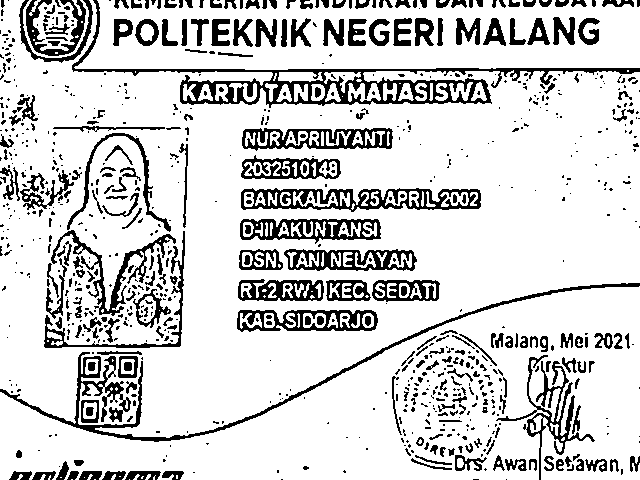

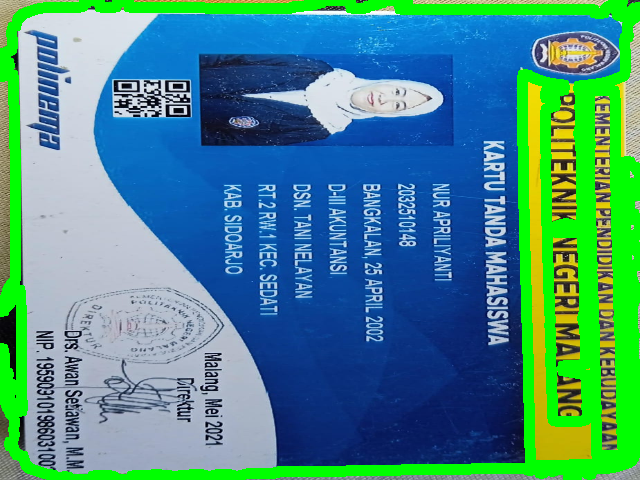

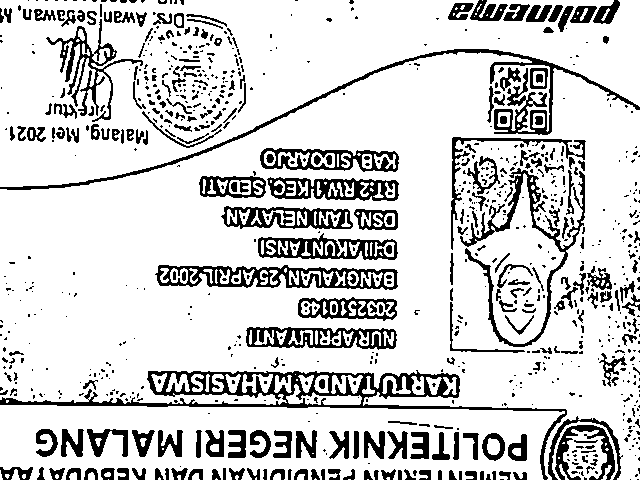

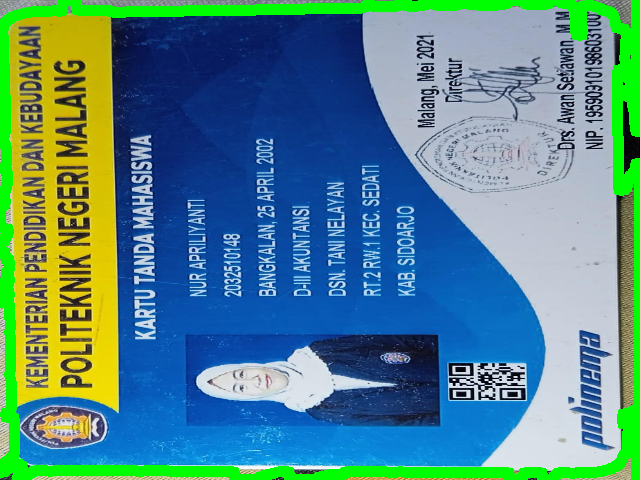

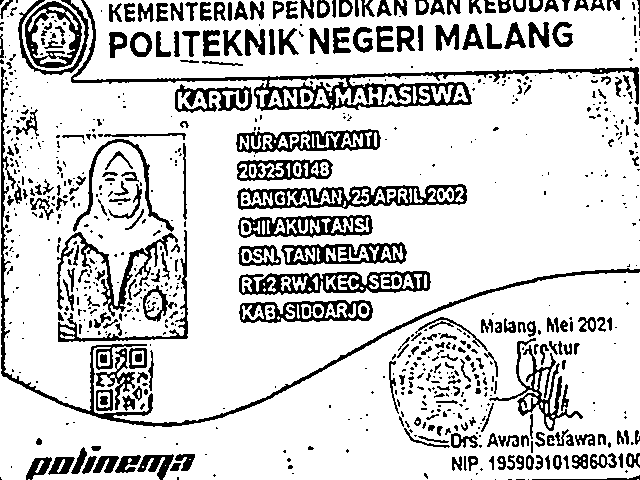

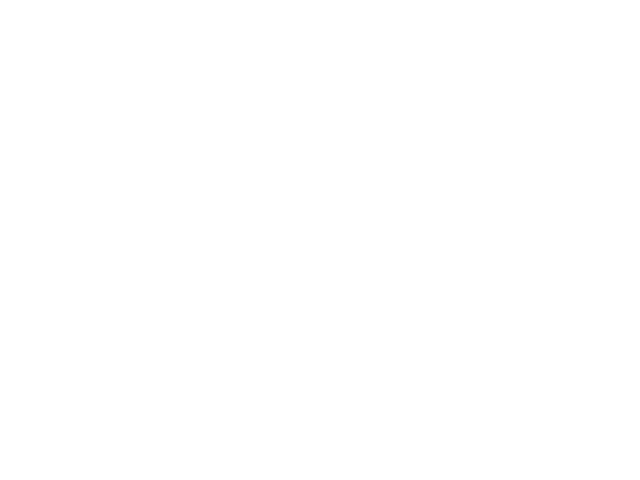

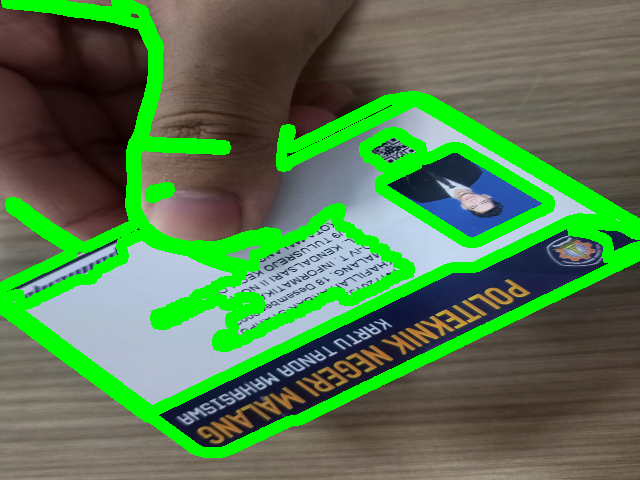

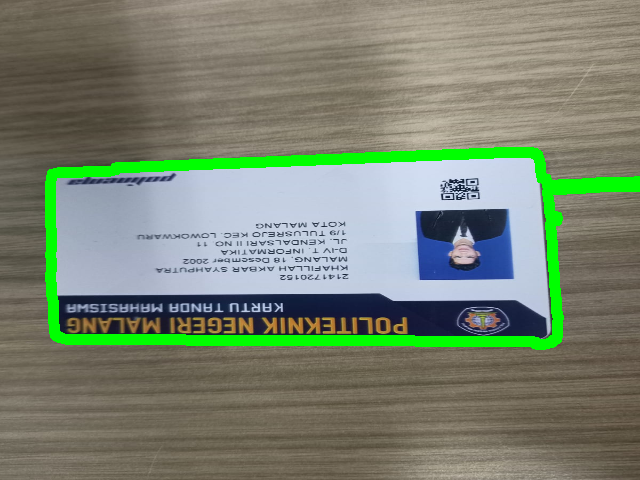

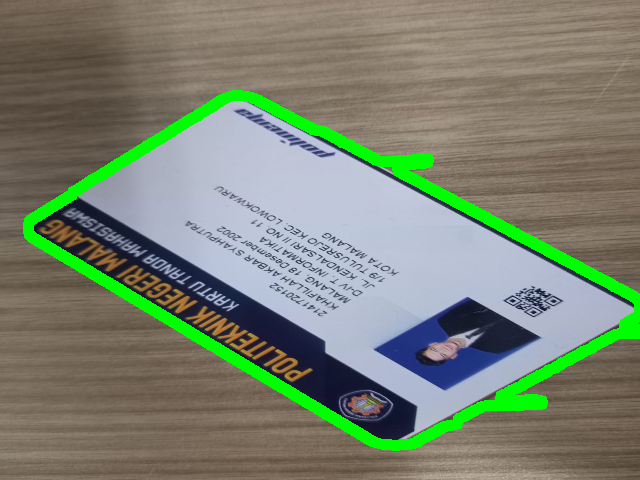

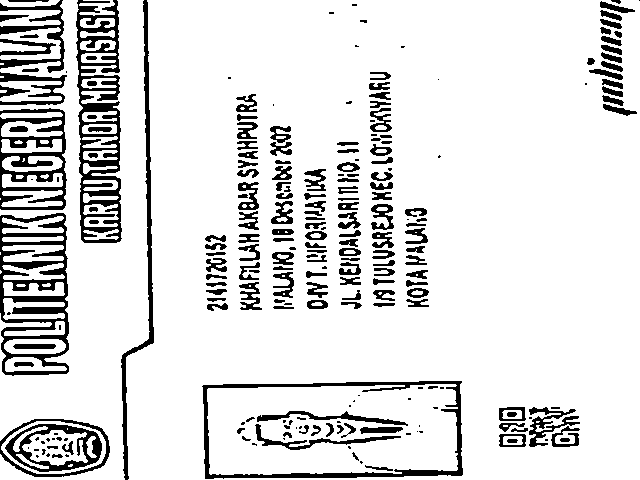

In [60]:
image_paths = [
    '/content/foto/aristya/3I_Muhammad Aristya Prayitno_1.jpg',
    '/content/foto/aristya/3I_Muhammad Aristya Prayitno_2.jpg',
    '/content/foto/aristya/3I_Muhammad Aristya Prayitno_3.jpg',
    '/content/foto/aristya/3I_Muhammad Aristya Prayitno_4.jpg',
    '/content/foto/aristya/3I_Muhammad Aristya Prayitno_5.jpg',
    '/content/foto/filla/3I_Khafillah Akbar Syaputra_1.jpg',
    '/content/foto/filla/3I_Khafillah Akbar Syaputra_2.jpg',
    '/content/foto/filla/3I_Khafillah Akbar Syaputra_3.jpg',
    '/content/foto/filla/3I_Khafillah Akbar Syaputra_4.jpg',
    '/content/foto/filla/3I_Khafillah Akbar Syaputra_5.jpg'
]

for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)
    cv2_imshow(preprocessing(img))

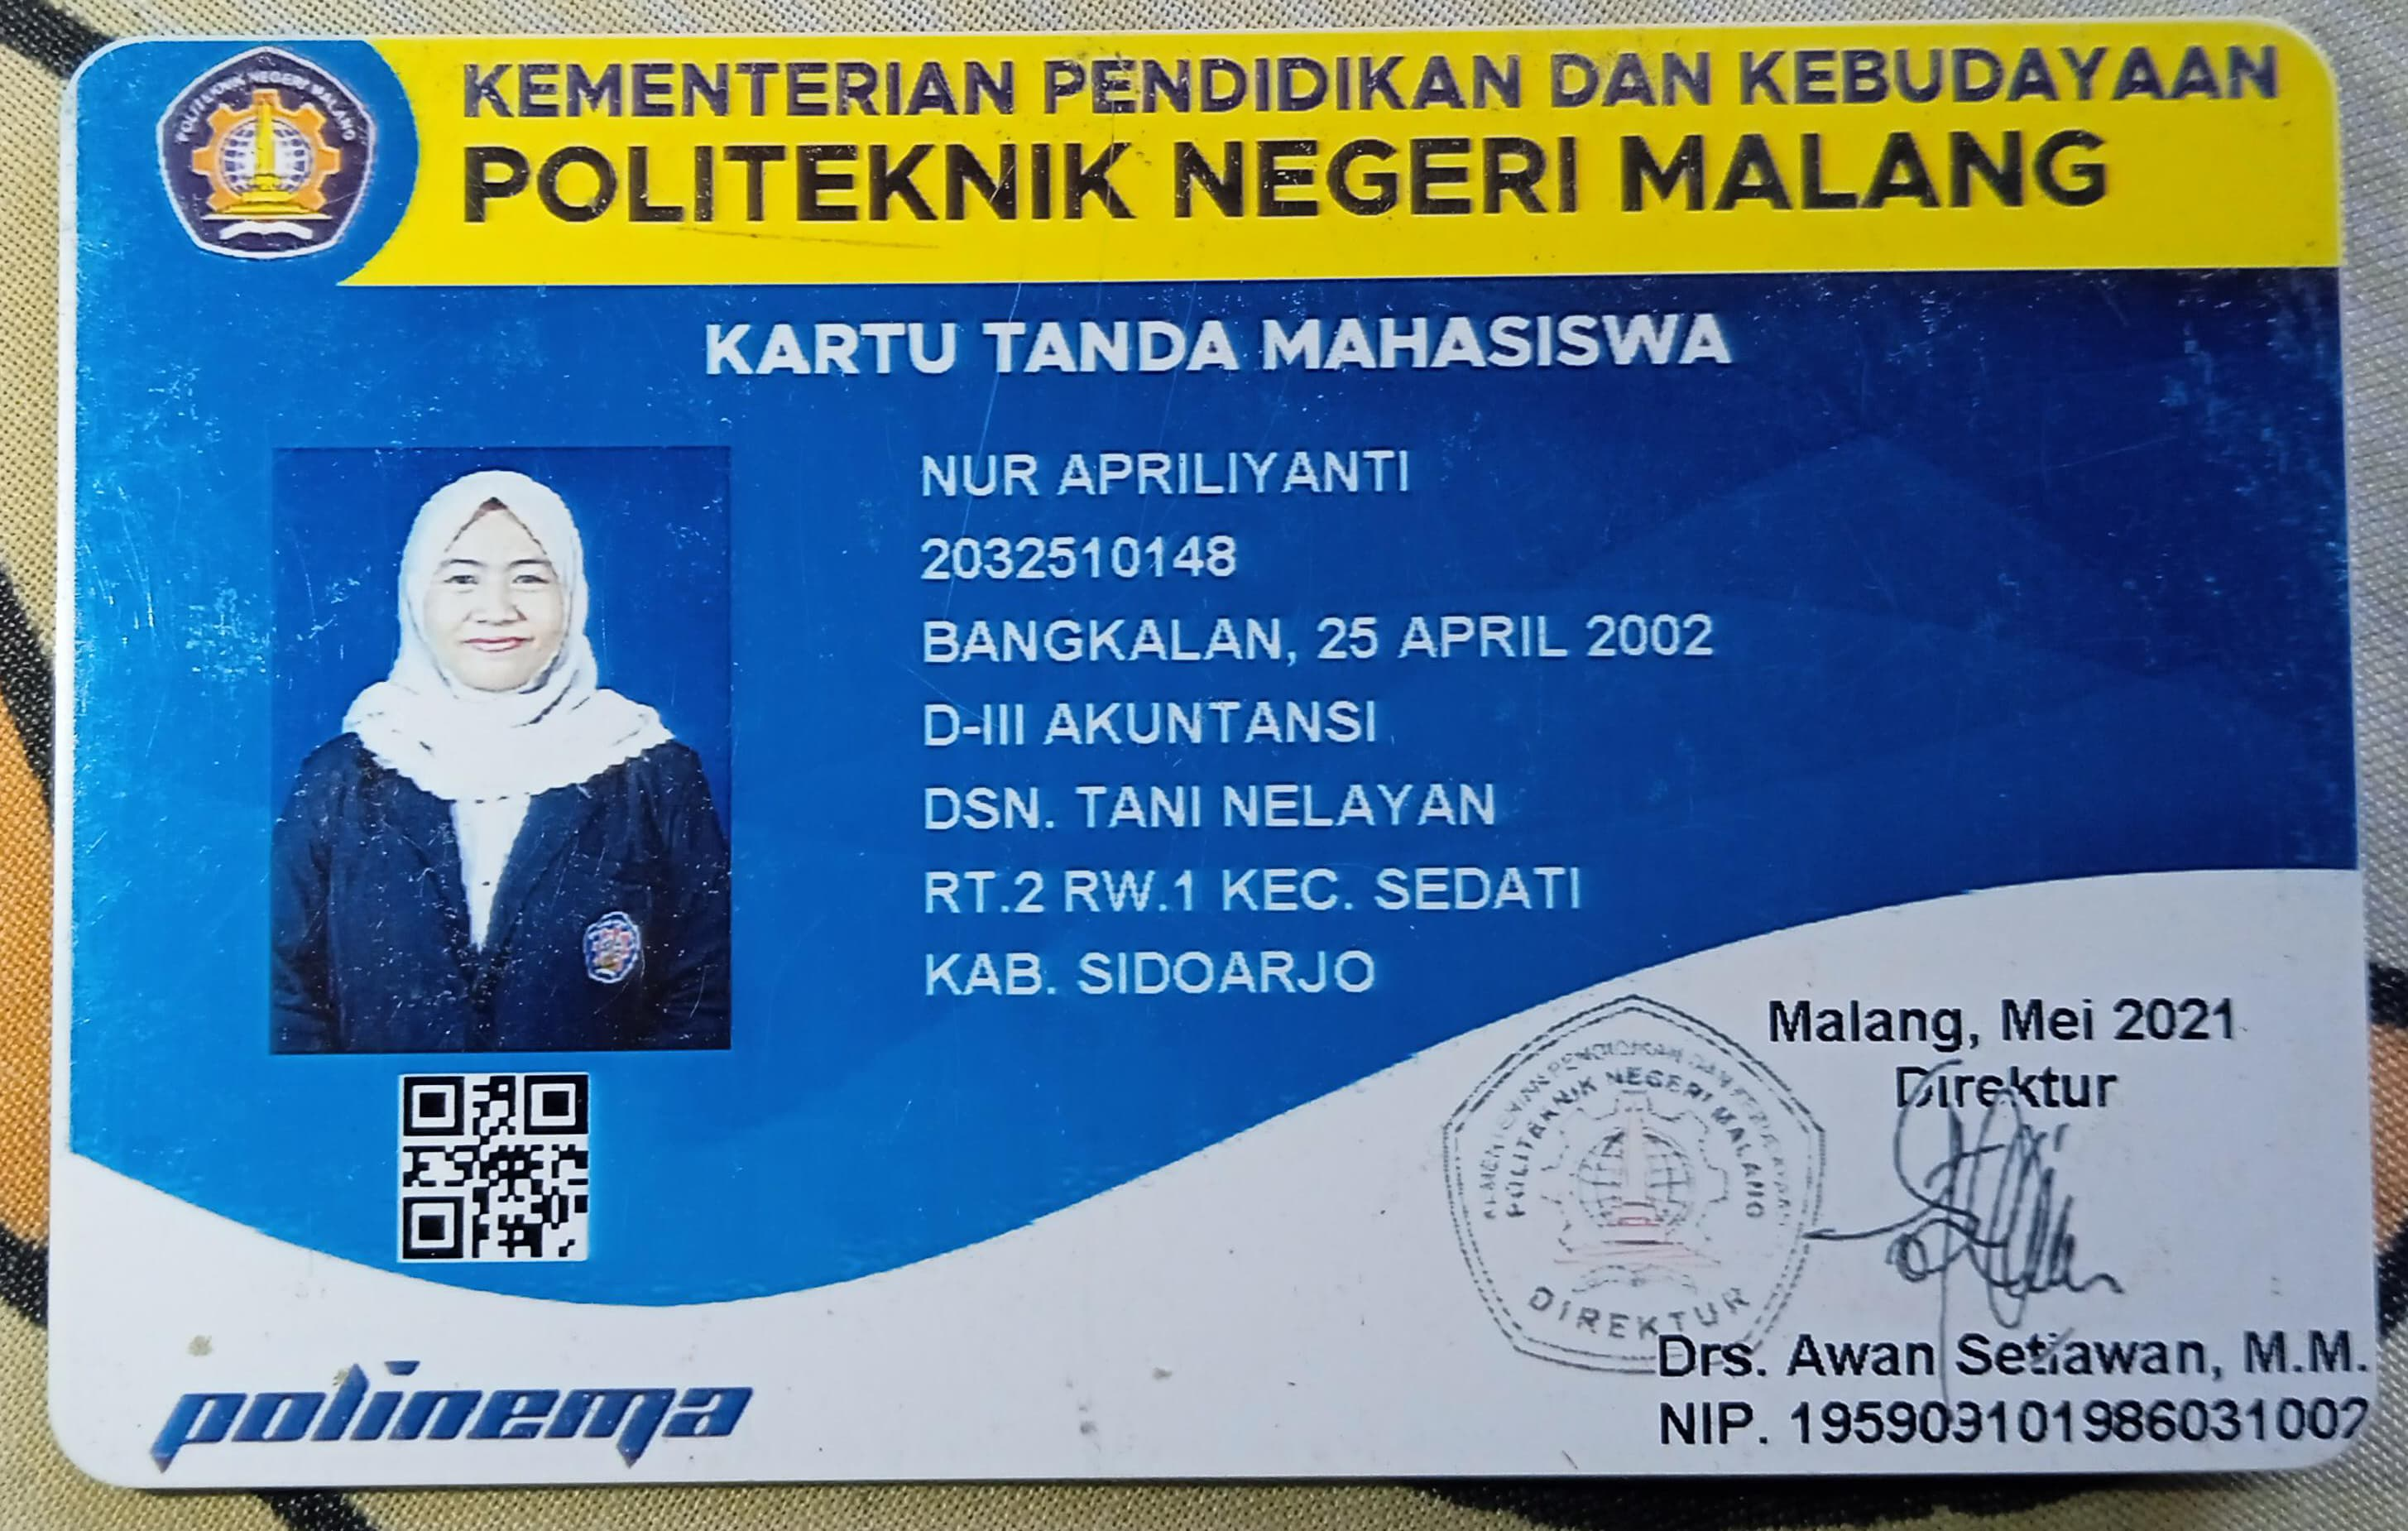

In [61]:
img = cv2.imread('/content/foto/aristya/3I_Muhammad Aristya Prayitno_1.jpg')
cv2_imshow(img)

In [65]:
img = cv2.imread('/content/foto/aristya/3I_Muhammad Aristya Prayitno_1_crop.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

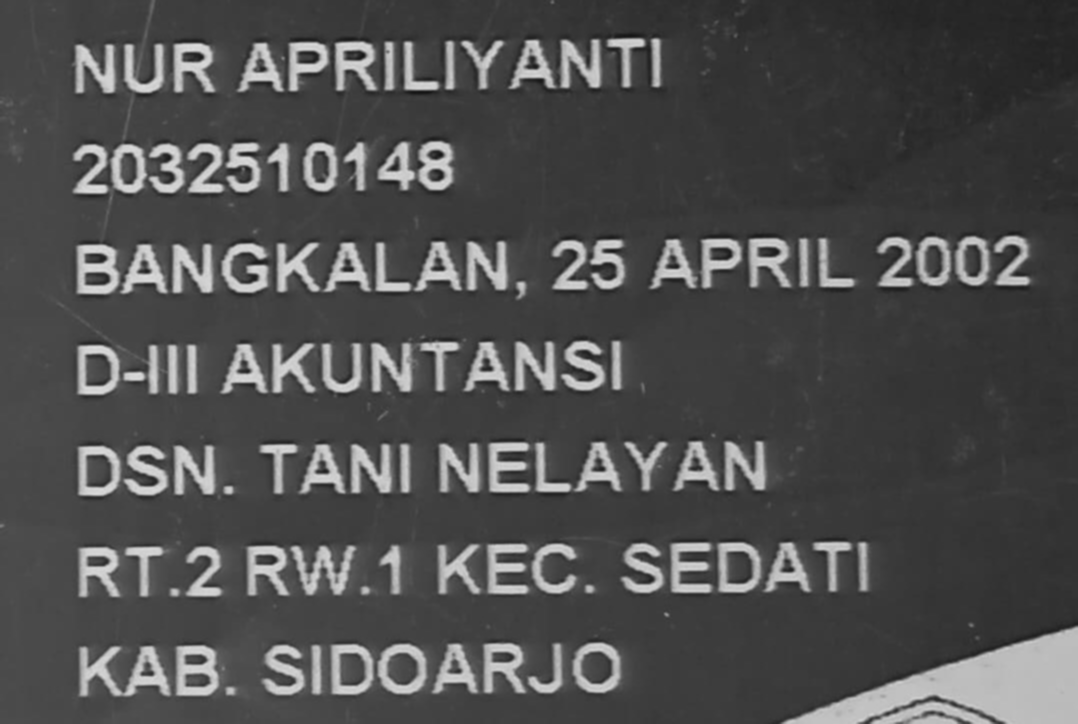

In [66]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
# check
cv2_imshow(blur)

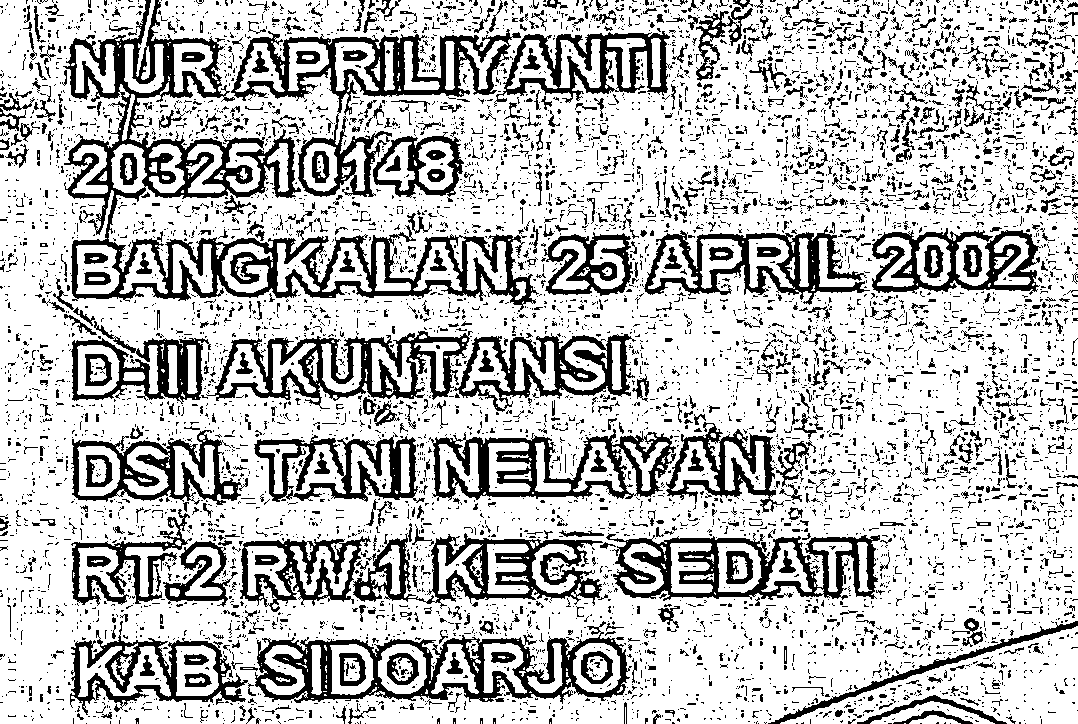

In [67]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)
# check
cv2_imshow(adaptive)

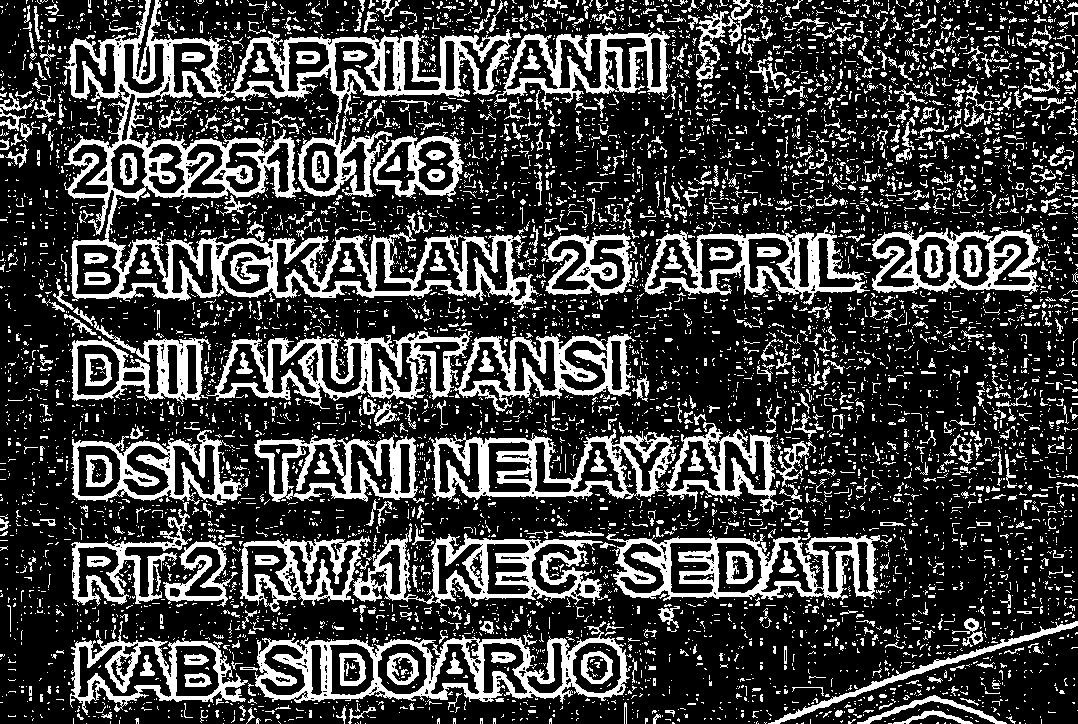

In [68]:
invertion = 255 - adaptive
# check
cv2_imshow(invertion)

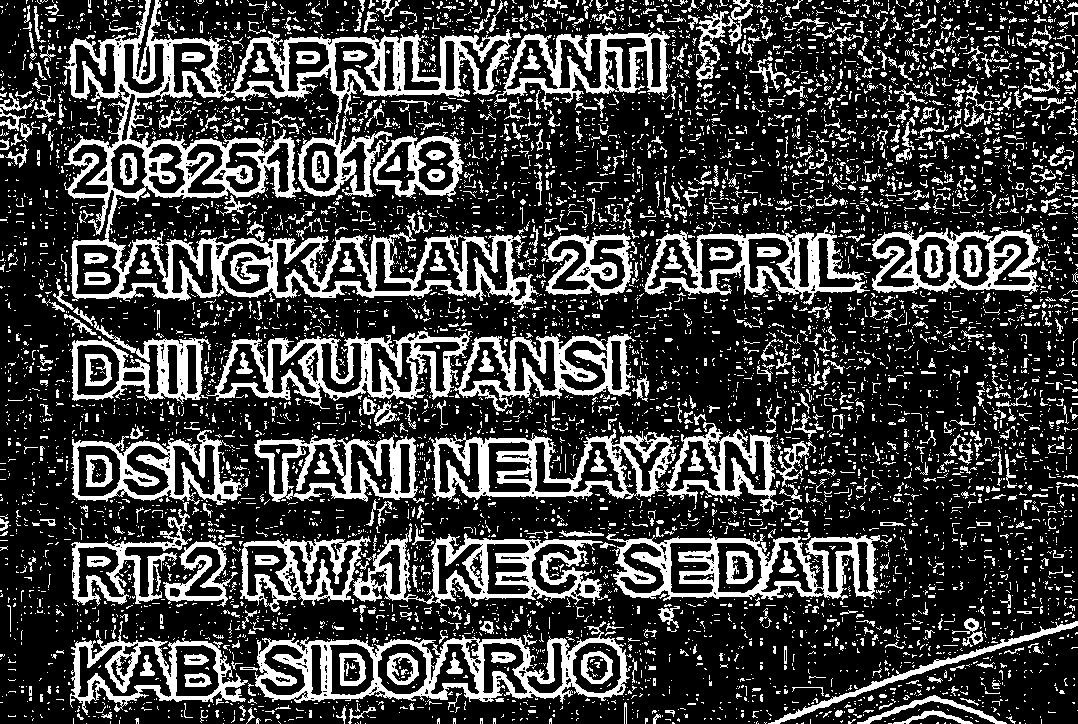

In [69]:
# Test erode
erode = cv2.erode(invertion, np.ones((1,1)))
cv2_imshow(erode)

In [70]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [71]:
conts = find_contours(erode.copy())

In [72]:
len(conts)

6981

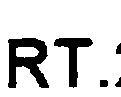

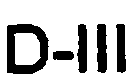

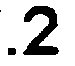

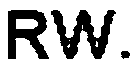

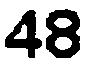

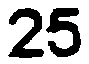

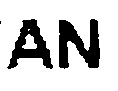

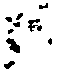

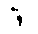

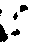

In [73]:
min_w, max_w = 30, 160
min_h, max_h = 34, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

In [74]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  print(thresh)
  return thresh

def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


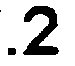

In [75]:
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

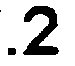

In [76]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [77]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [78]:
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

In [79]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  # thresh = thresholding(roi)
  # (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [80]:
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 30, 160
  min_h, max_h = 34, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [81]:
detected_char[0][1]

(71, 509, 121, 97)

In [82]:
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [83]:
model = load_model('/content/manual_ocr.model')

In [84]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [85]:
preds = model.predict(pixels)

1/1 [==============================] - 0s 79ms/step


In [86]:
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

8 8 8 8 8 8 8 8 8 8 

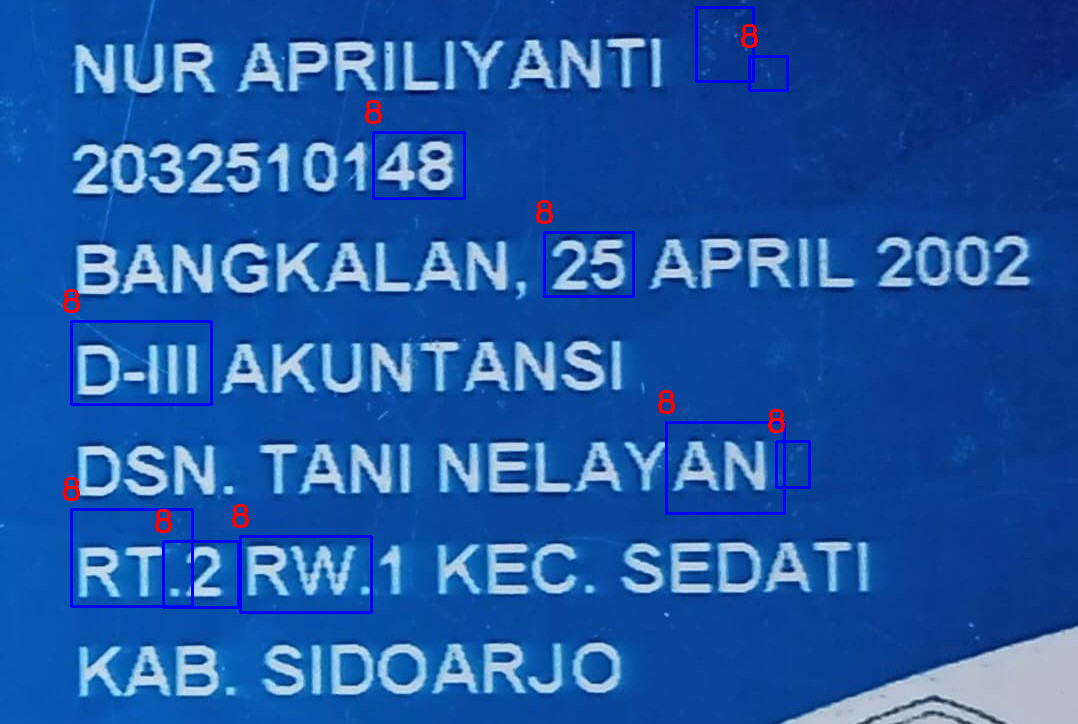

In [87]:
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)